# MLP: Multi-Layer Perceptron (다층 퍼셉트론)

다층 퍼셉트론(Multilayer perceptron, MLP)은 퍼셉트론을 여러층 쌓은 순방향의 인공 신경망입니다. 입력층(input layer)과 은닉층(hidden layer)과 출력층(output layer)으로 구성됩니다. 각 층에서는 활성함수를 통해 입력을 처리합니다.

이 노트북에서는 MNIST 데이터셋에서 다층 퍼셉트론을 훈련합니다.

In [1]:
import sys

# 코랩의 경우 깃허브 저장소로부터 utils.py를 다운로드 합니다.
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/rickiepark/Generative_Deep_Learning_2nd_Edition/main/notebooks/utils.py
    !mkdir -p notebooks
    !mv utils.py notebooks

--2024-01-18 08:35:59--  https://raw.githubusercontent.com/rickiepark/Generative_Deep_Learning_2nd_Edition/main/notebooks/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 771 [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]     771  --.-KB/s    in 0s      

2024-01-18 08:35:59 (51.5 MB/s) - ‘utils.py’ saved [771/771]



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display

## 0. 파라미터

MNIST (손글씨 숫자 데이터셋)은 28x28 크기의 흑백 숫자 이미지가 10개의 클래스로 구성되어 있습니다. (0~9)

In [3]:
NUM_CLASSES = 10

## 1. 데이터 준비

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

### 데이터 정규화 (normalization)
현재 데이터는 0\~255 값을 가지고 있기 때문에, 0\~1 사이로 스케일링 시켜줍니다.

### 원-핫 인코딩
원-핫 인코딩을 통하여 0~9의 정수형 값을 갖는 데이터를 0과 1로만 이루어진 벡터로 바꾸어 줍니다.
```
to_categorical(클래스, 클래스의 개수)
```

In [6]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

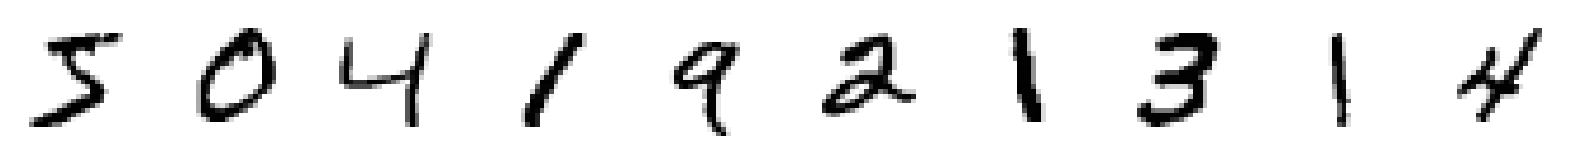

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [7]:
display(x_train[:10])
print(y_train[:10])

## 2. 모델 구축

In [8]:
input_layer = layers.Input((28, 28)) # 입력 레이어 정의

x = layers.Flatten()(input_layer) # 이미지를 1D 벡터로 펼치는 Flatten 레이어 추가
x = layers.Dense(200, activation="relu")(x) # 첫 번째 은닉층. 뉴런 수: 200, 활성화 함수: ReLU
x = layers.Dense(150, activation="relu")(x) # 두 번째 은닉층. 뉴런 수: 150, 활성화 함수: ReLU

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x) # 출력층. 뉴런 수: NUM_CLASSES(클래스 수), 활성화 함수: Softmax

model = models.Model(input_layer, output_layer) # 모델 정의

model.summary() # 모델 구조 출력

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 188660 (736.95 KB)
Trainable params: 188660 (736.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3. 모델 훈련

최적화 함수: Adam

In [9]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

**batch_size**: 한 번의 반복에 사용되는 샘플의 수<br />
> 일반적으로 32, 64, 128과 같은 2의 제곱수로 설정

**epoch**: 전체 데이터셋에 대해 한 번의 학습 과정을 거치는 횟수<br />
**shuffle**: 훈련 데이터를 epoch마다 섞을지 여부를 결정


In [10]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2466 - accuracy: 0.9307
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1008 - accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0676 - accuracy: 0.9794
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0496 - accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0375 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0277 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0226 - accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0179 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0152 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

## 4. 평가

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0739 - accuracy: 0.9810


[0.07386478781700134, 0.9810000061988831]

In [12]:
CLASSES = np.array(
    [
        "0",
        "1",
        "2",
        "3",
        "4",
        "5",
        "6",
        "7",
        "8",
        "9",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 3ms/step


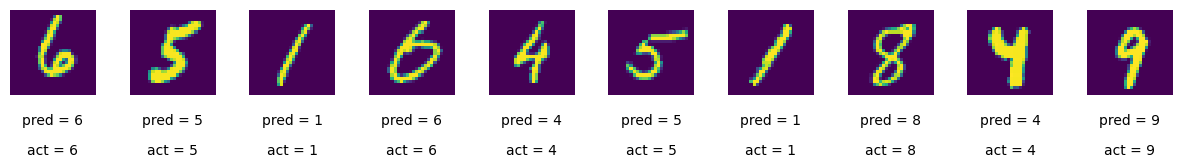

In [13]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)